In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 로드

In [6]:
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/87da40c3ed3b6c876323e37e942ac86624e34490/AAME.csv"
df = pd.read_csv(url)

display(df.head())

openValues = df['Open']

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.0,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.0,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.0,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.0,3.95,3.75,3.75,3.129709,12700


# 특징값 정규화

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(openValues.values.reshape(-1, 1))

# Train/Test 데이터 분리

In [9]:
TEST_SIZE = 2000
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]


# 순차 훈련 데이터 생성

In [10]:
def make_sample(data, window):
  train = []
  target = []
  for i in range(len(data) - window):
    train.append(data[i:i+window])
    target.append(data[i+window])
  return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)

# RNN 정의

In [11]:
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', input_shape=(10, 1)))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# RNN 학습

Epoch 1/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0200
Epoch 2/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0059
Epoch 3/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0048
Epoch 4/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0042
Epoch 5/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035
Epoch 6/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0038
Epoch 7/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0036
Epoch 8/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0034
Epoch 9/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0035
Epoch 10/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0030
Epoch 11/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0031
Epoch 12/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0034
Epoch 13/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0038
Epoch 14/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0032
Epoch 15/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 

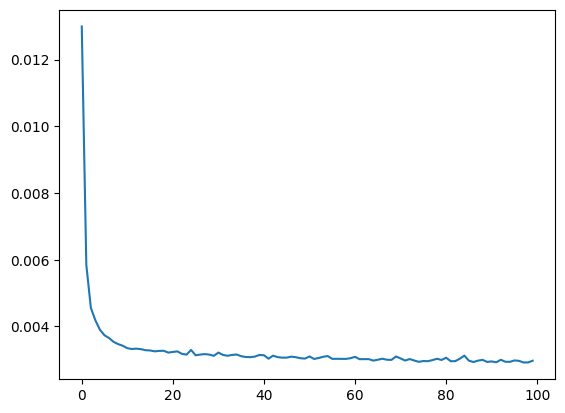

In [12]:
history = model.fit(X_train, y_train, epochs=100, verbose=1)
plt.plot(history.history['loss'], label="loss")
plt.show()

# 미래 주가 예측 및 정확도 평가

In [13]:
X_test, y_test = make_sample(test_data, 30)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MSE  : 0.0002
RMSE : 0.0142
MAE  : 0.0122
R²   : 0.9172


# 그래프 그리기

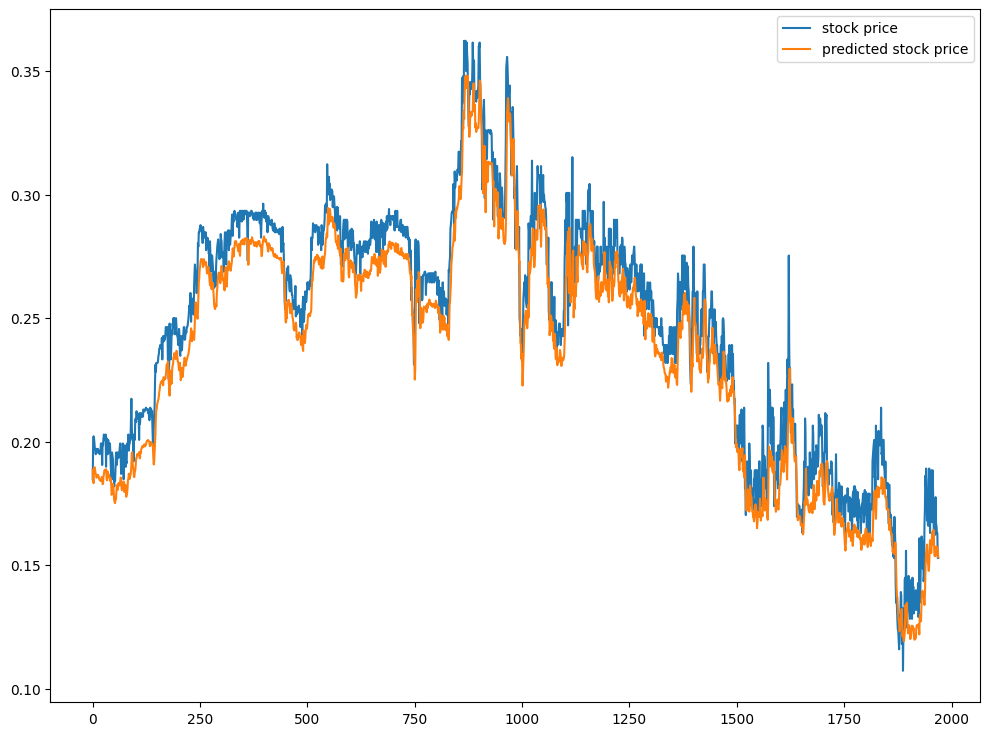

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plt.plot(y_test, label='stock price')
plt.plot(y_pred, label='predicted stock price')
plt.legend()
plt.show()